# Quy trình làm việc với pytorch

In [1]:
# Bản chất của machine learning hay deep learning là lấy dữ liệu trong quá khứ để xây dựng thuật toán (ví dụ như neural network) để khám phá ra quy luật của dữ liệu đó, sau đó dự đoán tương lai.
what_were_covering = {1: "data (chuẩn bị dữ liệu và tạo dữ liệu)",
    2: "xây dựng mô hình (modeling)",
    3: "lắp mô hình với dữ liệu(fitting)",
    4: "dự đoán và đánh giá model (predicting and evaluating)",
    5: "lưu và load model (saving and loading)",
    6: "đặt mô hình vào production (putting a model in production)"
}

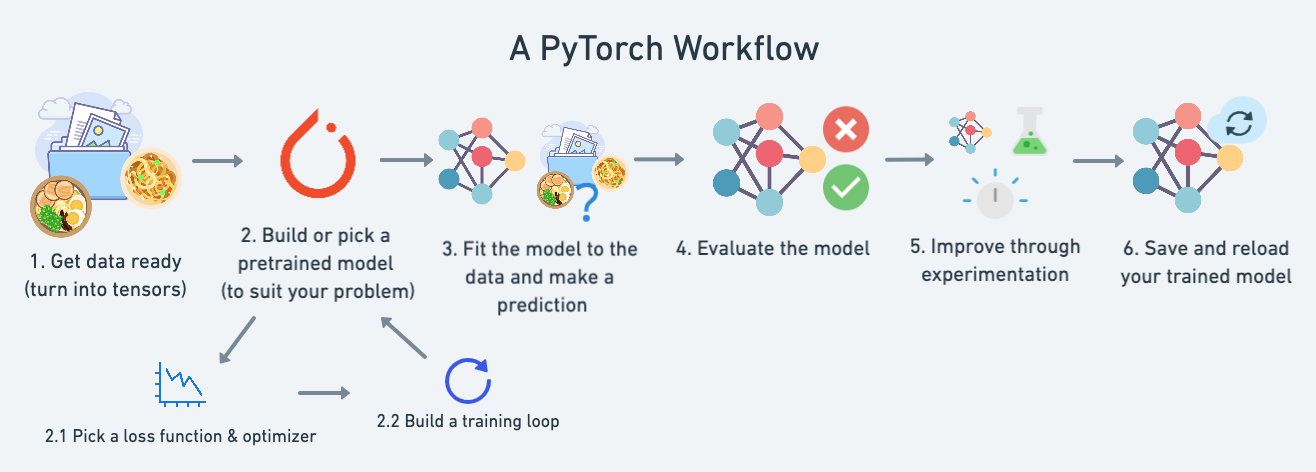

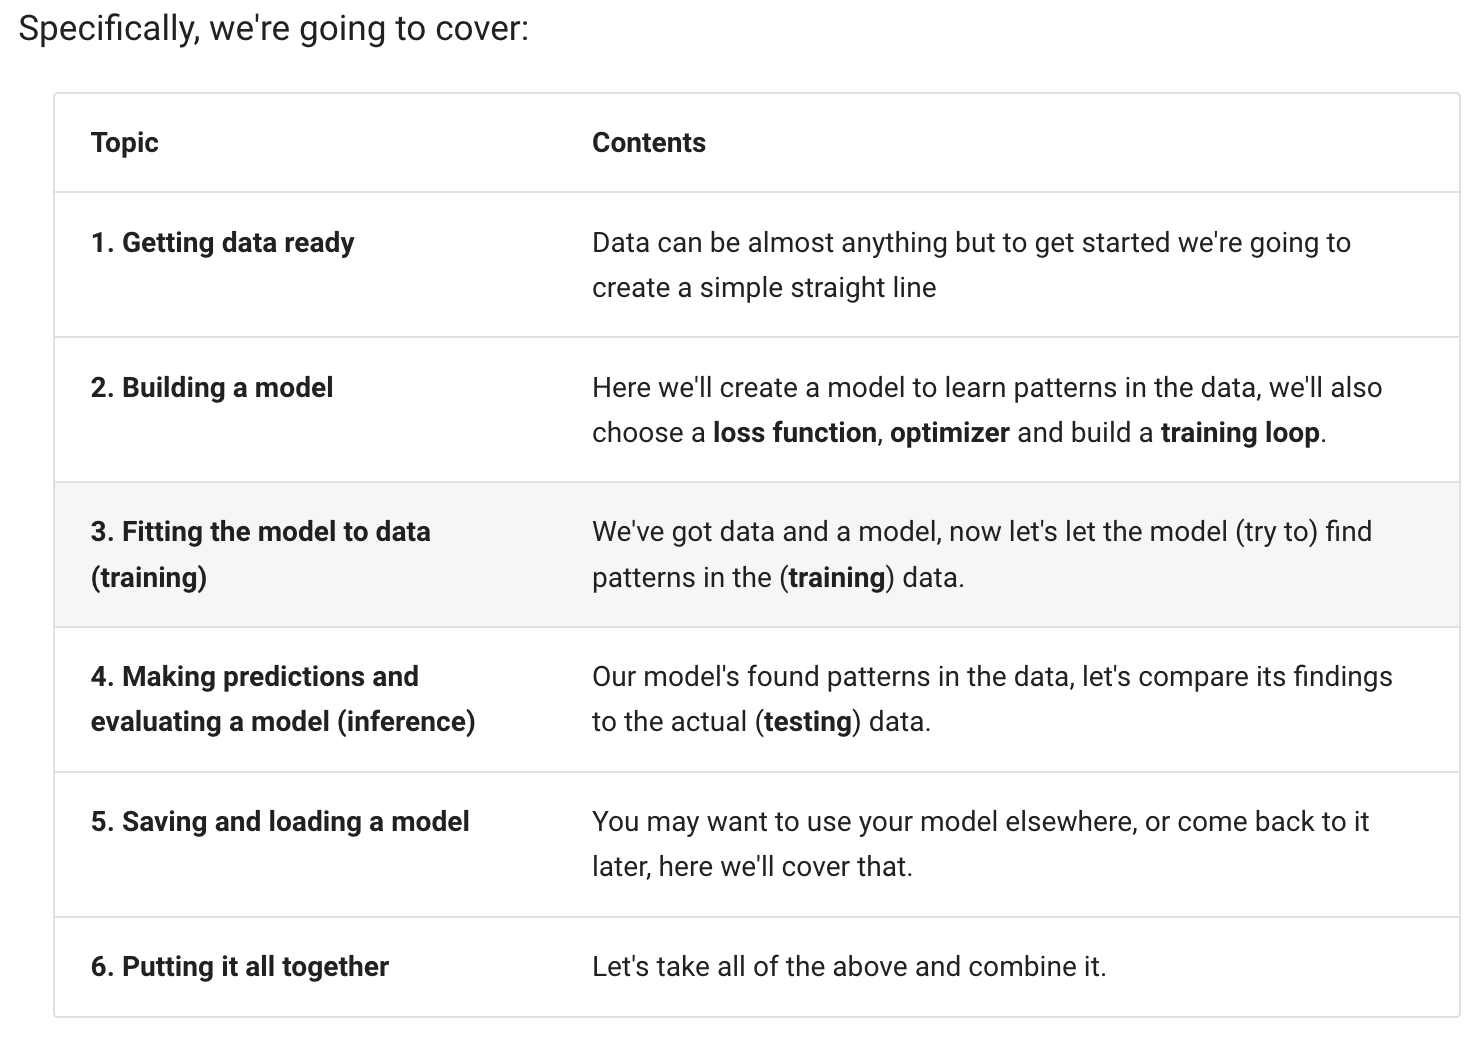

# Dzô

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

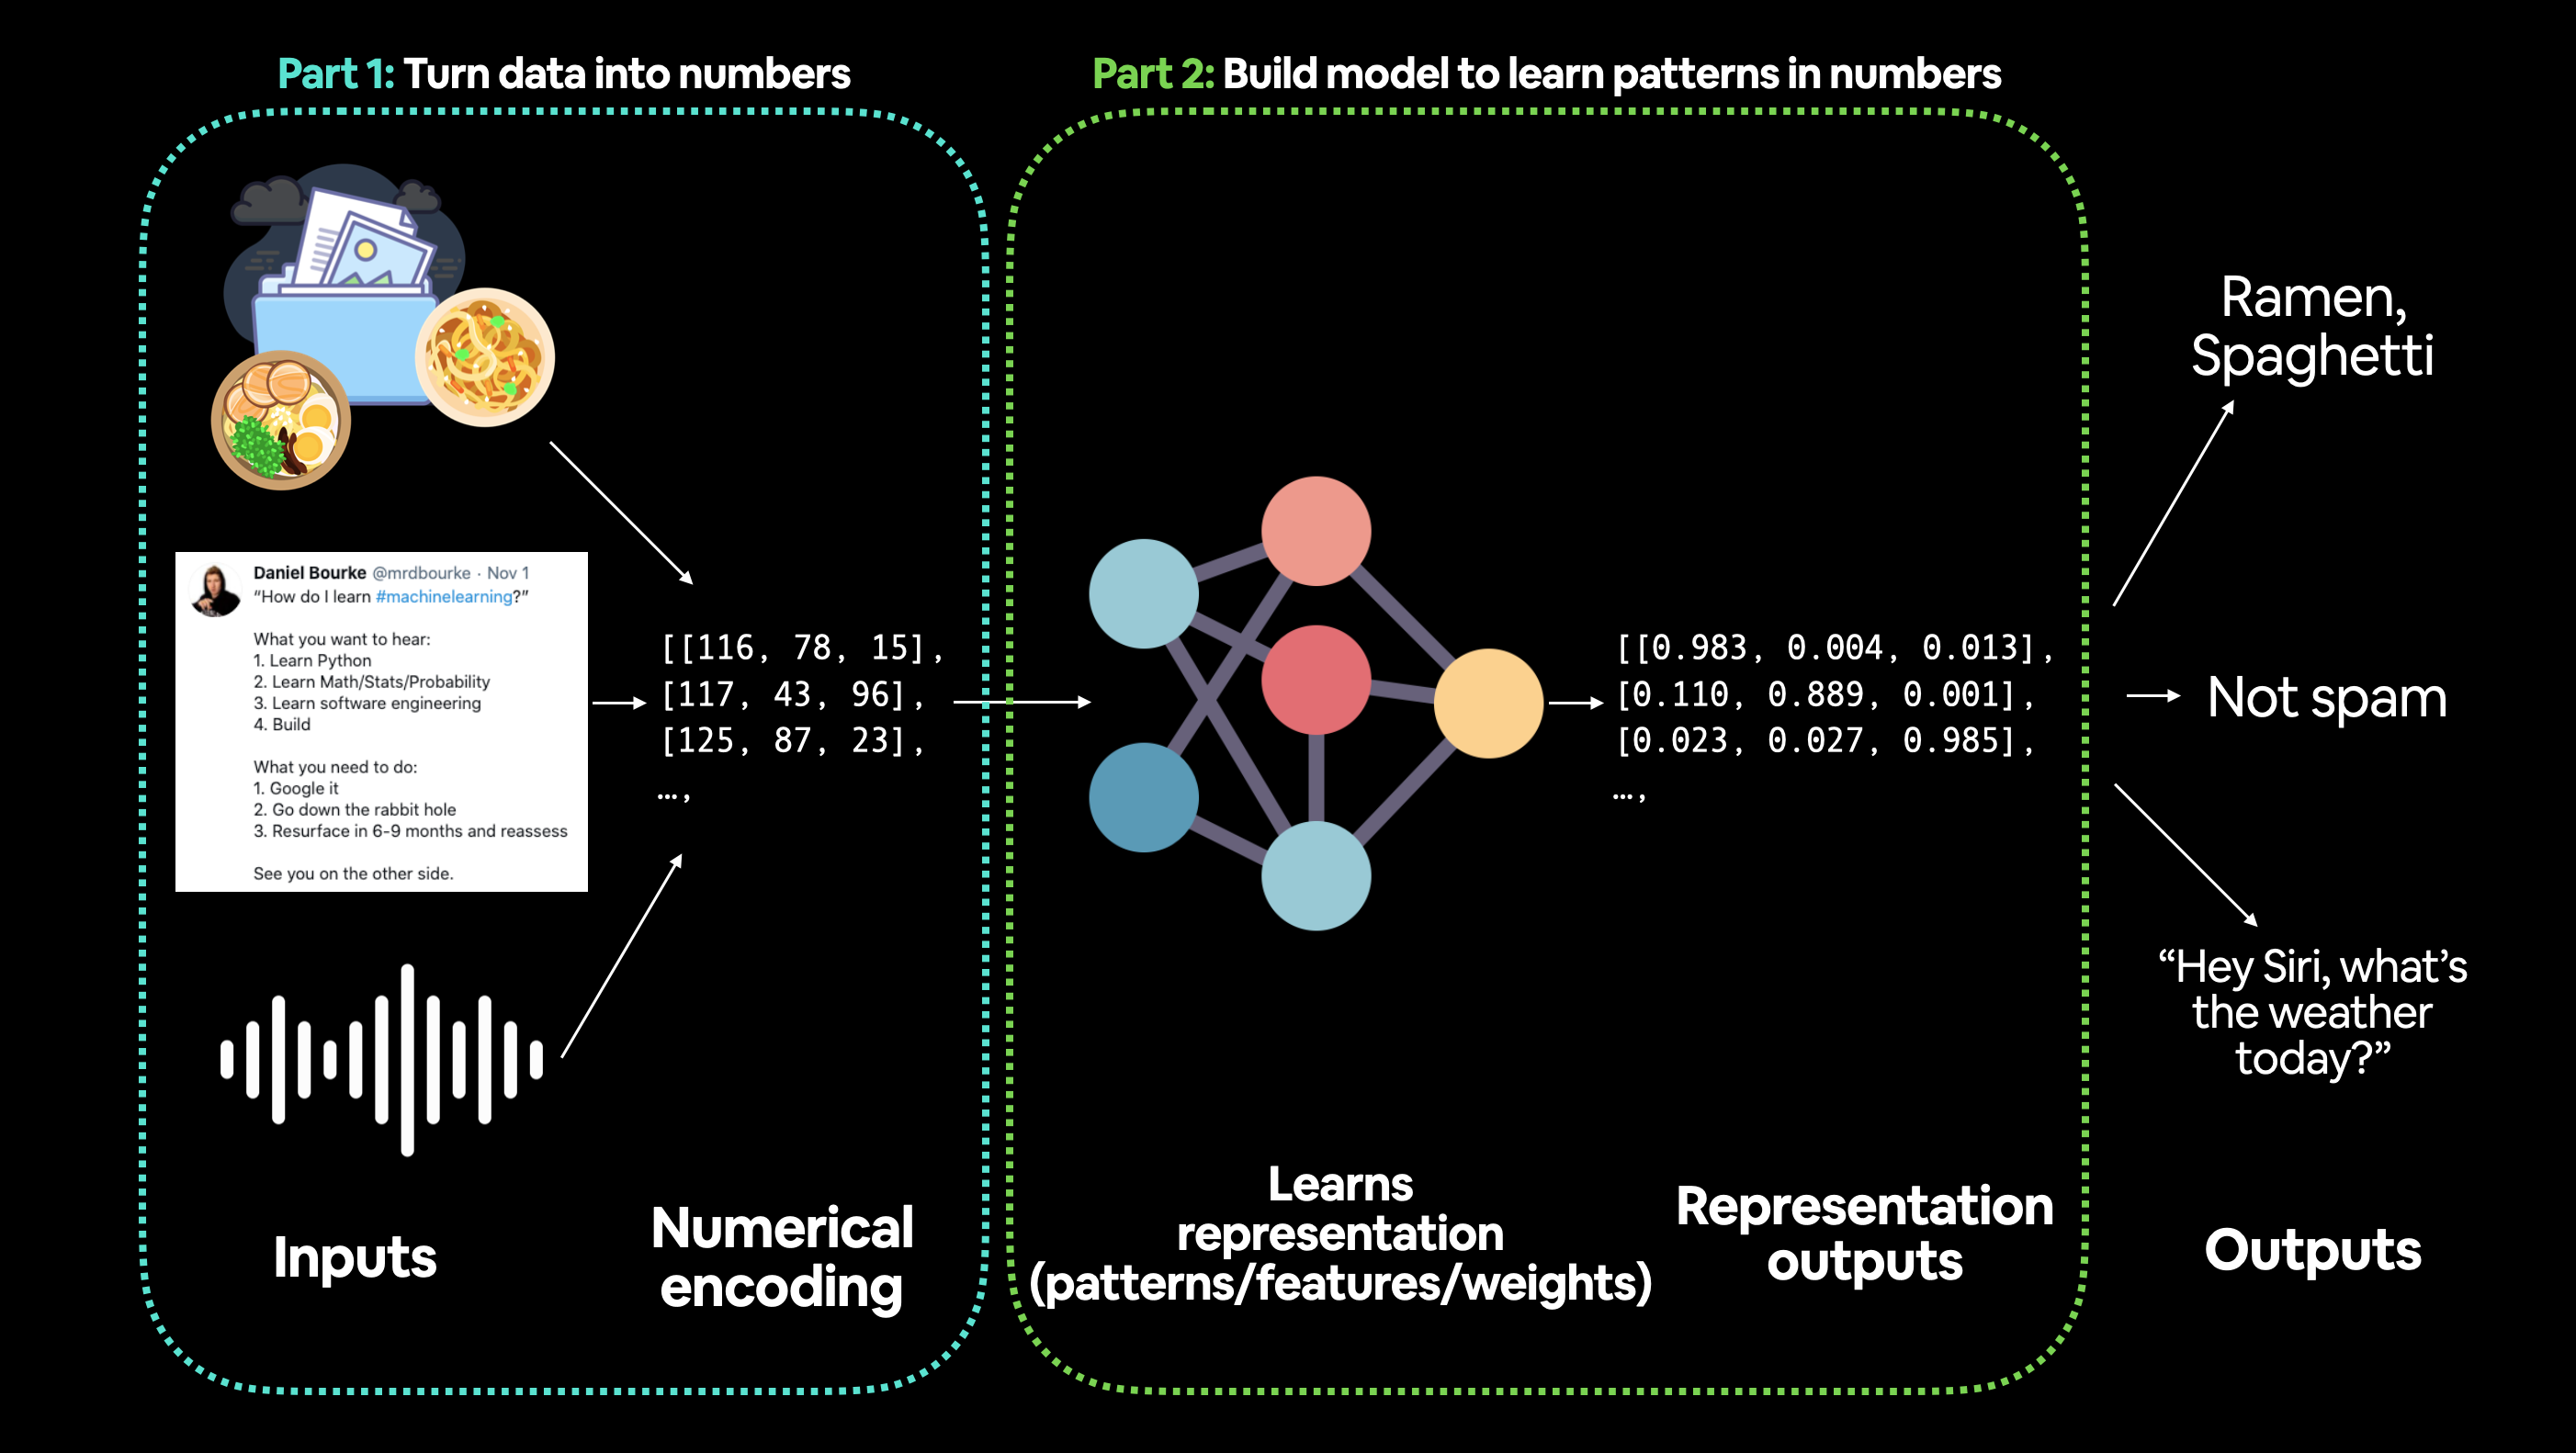

In [3]:
# Data loading (chuẩn bị dữ liệu và tạo dữ liệu) là bước đầu tiên trong một machine learning project. 
# Trong bước này, chúng ta sẽ tải dữ liệu từ một nguồn nào đó, sau đó chuyển đổi dữ liệu đó thành dạng mà mô hình có thể hiểu được. 
# Trong PyTorch, chúng ta có thể tải dữ liệu từ nhiều nguồn khác nhau, ví dụ như từ file CSV, file JSON, SQL database, hay thậm chí là từ internet.
# Có nhiều dạng dữ liệu khác nhau như text, image, audio, video, hay time series.

# Machine learning gồm 2 phần:
# 1. Chuyển đổi dữ liệu thành number (data preprocessing)
# 2. Chọn hoặc xây dựng mô hình để biểu diễn dữ liệu tốt nhất có thể (modeling)

# Vì kết quả cuối cùng của machine learning là xây dựng 1 công thức đại diện cho mối liên hệ của input và output
# Giả sử chúng ta biết trước công thức đó và thử dùng machine leaning dùng để tìm công thức để xem kết quả có giống nhau hay không
# Trong ví dụ này sẽ dùng Gradient Descent

# Ví dụ:
# Tạo trước công thức (đại diện cho mối liên hệ của input và output) - Đây là công thức chúng ta muốn machine learning tìm ra
weight = 0.7
bias = 0.3

# Tạo dữ liệu (input và output)
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # X là input, unsqueeze để tạo thêm 1 chiều
y = weight * X + bias # y là output

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# Sau khi có input và output, chúng ta sẽ phân chia chúng thành 2 phần: training set và test set (Đôi khi còn có validation set)
# Đây là bước rất quan trọng trong machine learning, nếu không phân chia đúng thì kết quả cuối cùng sẽ không chính xác
# Thông thường sẽ phân chia theo tỉ lệ 80% training set và 20% test set (Nếu có validation set thì sẽ là 60% training set, 20% validation set, 20% test set)

# Ví dụ:
# Phân chia dữ liệu thành 2 phần: training set và test set
train_size = int(len(X) * 0.8) # 80% training set và 20% test set
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

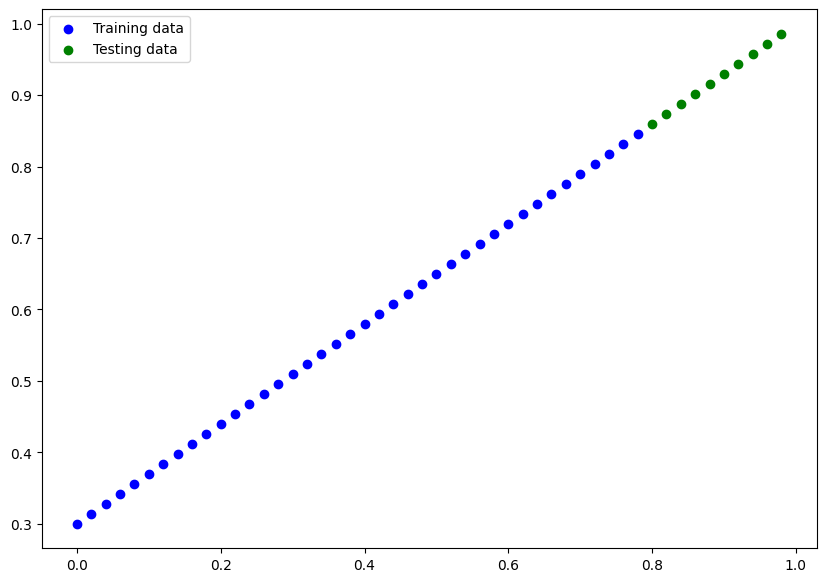

In [5]:
# Model được tạo sẽ cố gắng học cách biểu diễn mối liên hệ giữa input và output X_train và y_train và sau đó sẽ đánh giá mô hình với X_test và y_test
# Để hiểu data hơn trước hết chúng ta phải visualize data (biểu diễn dữ liệu dưới dạng đồ thị)
# Đồ thị sẽ giúp chúng ta hiểu được mối liên hệ giữa input và output
# Nếu mối liên hệ giữa input và output là một đường thẳng thì chúng ta có thể dùng linear regression để tìm ra công thức đại diện cho mối liên hệ đó
# Nếu mối liên hệ giữa input và output là một đường cong thì chúng ta có thể dùng neural network để tìm ra công thức đại diện cho mối liên hệ đó
# Để visualize data chúng ta sẽ dùng matplotlib

def plot_predictions(train_data=X_train, 
                        train_labels=y_train, 
                        test_data=X_test, 
                        test_labels=y_test, 
                        predictions=None):
        """
        Vẽ data huấn luyện, data kiểm tra và dự đoán nếu không None
        """
        plt.figure(figsize=(10, 7))
        # Vẽ training data trong màu xanh dương
        plt.scatter(train_data, train_labels, c="b", label="Training data")
        # Vẽ test data trong màu xanh lá cây
        plt.scatter(test_data, test_labels, c="g", label="Testing data")
        # Nếu predictions không None thì vẽ predictions trong màu đỏ và có label là "Predictions" 
        if predictions is not None:
            plt.scatter(test_data, predictions, c="r", label="Predictions")
        # Show the legend
        plt.legend();

# Visualize data
# Visualize là 1 người bạn đồng hành rất tốt trong machine learning
plot_predictions()

# Xây dựng model

In [6]:
# Tạo 1 linear regression model
class LinearRegressionModel(nn.Module): # nn.Module là 1 class của PyTorch là nền tảng để xây dựng neural network và các mô hình machine learning khác nhau 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- Bắt đầu với giá trị ngẫu nhiên (giá trị này sẽ được điều chỉnh khi mô hình học)
                                dtype=torch.float), # <- PyTorch thích float32 mặc định
                                requires_grad=True) # <- Chúng ta có thể cập nhật giá trị này với gradient descent

        self.bias = nn.Parameter(torch.randn(1, # <- Bắt đầu với giá trị ngẫu nhiên (giá trị này sẽ được điều chỉnh khi mô hình học)
                                dtype=torch.float), # Giống như trên
                                requires_grad=True)

    # Forward method (hàm forward) sẽ được gọi khi chúng ta gọi model (model = LinearRegressionModel()) như 1 hàm (model()). Nó là hàm tính toán output của model dựa trên input (ví dụ như tính toán output của model dựa trên input là 1 số) 
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" là input (từ tập train hoặc test) và "torch.Tensor" là kiểu dữ liệu trả về của output
        return self.weights * x + self.bias # <- Đây là công thức linear regression (y = wx + b) 

In [7]:
# Các yếu tố cần để xây dựng 1 model trong PyTorch:
# Pytorch có 4 model thiết yếu là torch.nn (neural network), torch.optim (các thuật toán tối ưu hóa), torch.utils.data.Dataset (để tạo dữ liệu) và torch.utils.data.DataLoader (để tải dữ liệu)
# torch.nn (neural network) chứa tất cả các building blocks (các khối xây dựng) của neural network (ví dụ như các layer, các activation function, các loss function, các optimizer, các metric, ...) 
# torch.nn.Parameter có thể sử dụng với nn.Module. Ví dụ requires_grad=True để cho PyTorch biết rằng chúng ta muốn cập nhật giá trị của parameter này với gradient descent
# torch.nn.Module là nền tảng để xây dựng neural network và các mô hình machine learning khác nhau 
# torch.otim (các thuật toán tối ưu hóa) chứa tất cả các thuật toán tối ưu hóa (ví dụ như gradient descent, stochastic gradient descent, Adam, ...)

![Alt text](images/image.png)

In [8]:
# Để kiểm tra nội dung của 1 Pytorch model chúng ta có thể dùng hàm model.parameters()

torch.manual_seed(42) # <- Để có thể tái tạo lại kết quả
model0 = LinearRegressionModel() # <- Tạo 1 model

list(model0.parameters()) # <- In ra nội dung của model

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# Chúng ta có thể kiểm tra state_dict của model bằng cách dùng hàm model.state_dict()
model0.state_dict()

# Weight và bias của model được khởi tạo ngẫu nhiên

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
# Dự đoán với model0

with torch.inference_mode(): 
    y_preds = model0(X_test)
    
# Note: trong các phiên bản pytorch cũ bạn sẽ hay thấy torch.no_grad() thay vì torch.inference_mode()
# with torch.no_grad():
#   y_preds = model_0(X_test)

# Tuy nhiên torch.no_grad() không hoạt động với các model mới nhất của pytorch nên chúng ta sẽ dùng torch.inference_mode() thay thế cho torch.no_grad() 
# Với torch.inference_mode() thì chúng ta không thể dùng các hàm như model.train() hay model.eval() được nữa (vì vậy nó được dùng trong quá trình dự đoán) 

In [11]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


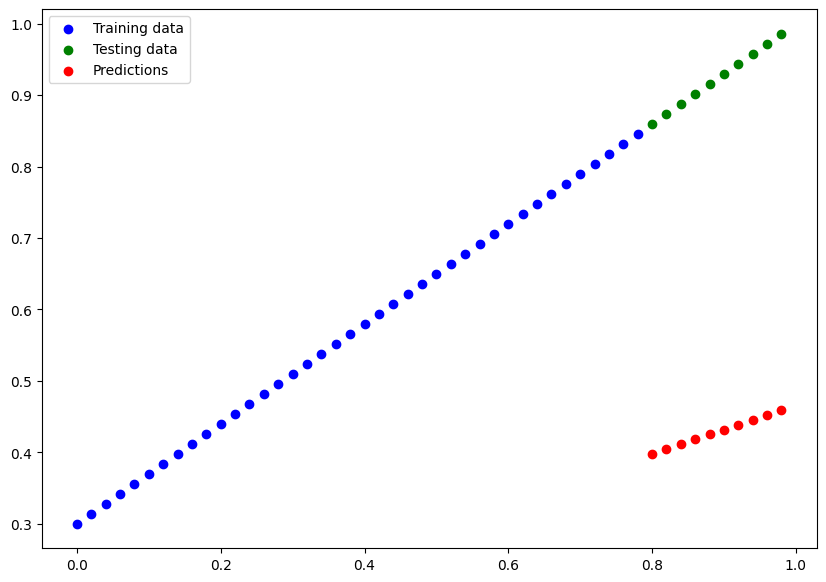

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

# TRAIN MODEL

In [14]:
# Ở trên chúng ta đã tạo 1 model và dự đoán với model đó, tuy nhiên kết quả dự đoán không chính xác vì weight và bias của model được khởi tạo ngẫu nhiên
# Để cải thiện kết quả dự đoán chúng ta cần phải cải thiện weight và bias của model bằng cách sử dụng gradient descent để tìm ra weight và bias tối ưu nhất cho model (tối ưu nhất có nghĩa là khi dự đoán với model thì kết quả dự đoán sẽ chính xác nhất) 

# Bắt đầu với loss function (hàm mất mát) và optimizer (bộ tối ưu hóa)
# Loss function là hàm để đánh giá mức độ chính xác của model (ví dụ như mean squared error, mean absolute error, categorical cross entropy, ...) 
# Optimizer là bộ tối ưu hóa (ví dụ như gradient descent, stochastic gradient descent, Adam, ...) để tối ưu hóa model (tối ưu hóa model có nghĩa là tìm ra weight và bias tối ưu nhất cho model)


![Alt text](images/image-1.png)

In [15]:
# Ví dụ:
# Tạo 1 loss function và 1 optimizer
loss_function = nn.L1Loss() # <- Tạo 1 loss function L1Loss (mean absolute error)
optimizer = torch.optim.SGD(model0.parameters(), lr=0.01) # <- Tạo 1 optimizer (stochastic gradient descent)

# trong đó parameters() là 1 method của model0 để lấy ra tất cả các parameter của model0 (weight và bias) và lr là learning rate (tốc độ học của model) 
# learning rate là 1 trong những hyperparameter quan trọng nhất trong machine learning (vì nó ảnh hưởng đến tốc độ học của model)

In [16]:
# Sau khi đã có loss function và optimizer chúng ta sẽ bắt đầu vòng lặp cho train và test model (vòng lặp này còn được gọi là training loop và testing loop) 

![Alt text](images/image-2.png)

In [17]:
# Pytorch training loop

# Truyền data vào model, nó sẽ thực hiện forward() method trong model 
# Tính toán loss (mức độ chính xác của model)
# Zero gradients (đặt gradient về 0)
# Backpropagation (tính toán gradient)
# Step the optimizer (cập nhật weight và bias của model) 

![Alt text](images/image-3.png)

In [18]:
# Tạo các list để lưu lại loss và các metric khác nhau
# Thông báo model là chúng ta cần đo đạc các metric khi đó các hàm dùng để train model sẽ không được chạy (vì vậy nó sẽ nhanh hơn)
# Bật torch.inference_mode() để tắt các hàm dùng để train model
# Truyền data vào model, nó sẽ thực hiện forward() method trong model
# Tính toán loss (mức độ chính xác của model) cho test data
# Hiển thị loss và các metric khác nhau của test data cho mỗi 10 epoch 

![Alt text](images/image-4.png)

In [20]:
torch.manual_seed(42)

# Tạo epochs (số lần lặp lại cho việc train model) và empty lists để lưu lại loss và các metric khác nhau
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Đặt model vào chế độ train (mặc định của model là chế độ train)
    model0.train()

    # 1. Forward pass trên training data bằng cách sử dụng hàm forward() method trong model
    y_pred = model0(X_train)
    # print(y_pred)

    # 2. Tính toán loss (mức độ chính xác của model) trên training data
    loss = loss_function(y_pred, y_train)

    # 3. Đặt gradient về 0
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Thực hiện 1 bước gradient descent (cập nhật weight và bias của model)
    optimizer.step()

    ### Testing

    # Đặt model vào chế độ evaluation (chế độ này sẽ tắt các hàm dùng để train model)
    model0.eval()

    with torch.inference_mode():
      # 1. Forward pass trên test data
      test_pred = model0(X_test)

      # 2. Tính toán loss trên test data
      test_loss = loss_function(test_pred, y_test.type(torch.float)) # Dự đoán sẽ trả về torch.float nên chúng ta cần phải so sánh xong với tensor cho cùng kiểu dữ liệu

      # In ra 
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4675942063331604 
Epoch: 10 | MAE Train Loss: 0.18615034222602844 | MAE Test Loss: 0.3328842222690582 
Epoch: 20 | MAE Train Loss: 0.08227583020925522 | MAE Test Loss: 0.2069590985774994 
Epoch: 30 | MAE Train Loss: 0.05181945487856865 | MAE Test Loss: 0.14023718237876892 
Epoch: 40 | MAE Train Loss: 0.04503796249628067 | MAE Test Loss: 0.11182951927185059 
Epoch: 50 | MAE Train Loss: 0.04132963344454765 | MAE Test Loss: 0.09809747338294983 
Epoch: 60 | MAE Train Loss: 0.03785243630409241 | MAE Test Loss: 0.08776430785655975 
Epoch: 70 | MAE Train Loss: 0.03441363573074341 | MAE Test Loss: 0.0794917643070221 
Epoch: 80 | MAE Train Loss: 0.030979642644524574 | MAE Test Loss: 0.07190609723329544 
Epoch: 90 | MAE Train Loss: 0.02754882536828518 | MAE Test Loss: 0.06363357603549957 


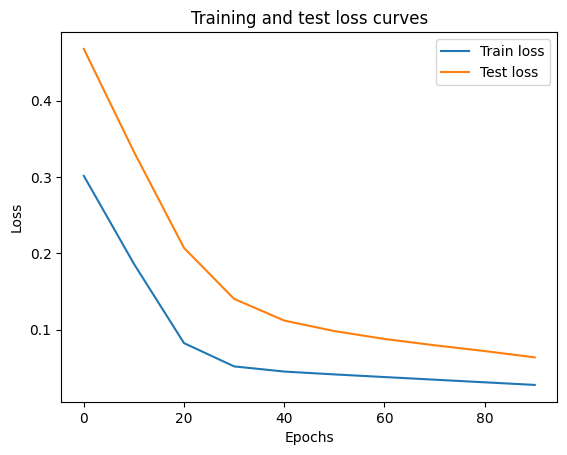

In [21]:
# Plot loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [22]:
# Loss của test data giảm dần theo thời gian, điều này có nghĩa là model đang học cách biểu diễn mối liên hệ giữa input và output tốt hơn theo thời gian 

# Tìm parameter của model (weight và bias) sau khi đã train model
print("Giá trị của weight và bias sau khi train model là:")
print(model0.state_dict())
print("\nCòn giá trị của weight và bias ban đầu là:")
print(f"weights: {weight}, bias: {bias}")

Giá trị của weight và bias sau khi train model là:
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

Còn giá trị của weight và bias ban đầu là:
weights: 0.7, bias: 0.3


In [ ]:
# Đây là toàn bộ ý nghĩa của machine learning: tìm ra mối liên hệ giữa input và output (ví dụ như tìm ra công thức đại diện cho mối liên hệ giữa input và output) thay vì chúng ta phải tìm ra mối liên hệ đó bằng tay (ví dụ như tìm ra công thức đại diện cho mối liên hệ giữa input và output bằng cách dùng toán học) chúng ta sẽ dùng machine learning để tìm ra mối liên hệ đó 

tensor([[0.8143],
        [0.8259],
        [0.8375],
        [0.8491],
        [0.8607],
        [0.8723],
        [0.8839],
        [0.8955],
        [0.9071],
        [0.9187]])

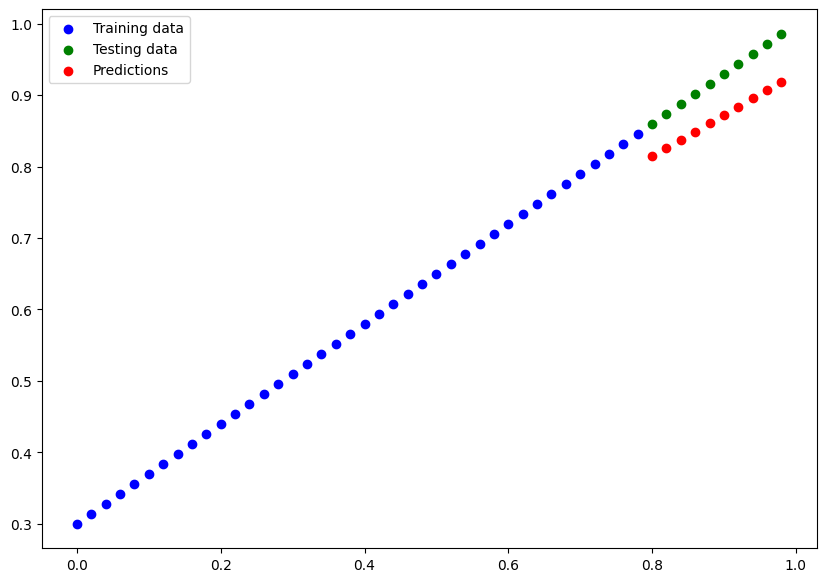

In [24]:
# Thực hiện dự đoán với model sau khi đã train model
# 1. Đặt model vào chế độ evaluation (chế độ này sẽ tắt các hàm dùng để train model)
model0.eval()

# 2. Cài đặt torch.inference_mode() để tắt các hàm dùng để train model
with torch.inference_mode():
    # 3. Dự đoán với model sau khi đã train model với device giống nhau. Mặc định của device là CPU
    # Kiểm tra device của model sau khi đã train model và device của X_test và y_test có giống nhau không (nếu không giống nhau thì sẽ báo lỗi) 
    assert model0(X_test).device == X_test.device == y_test.device
    y_preds = model0(X_test)
display(y_preds)

# Visualize dự đoán với model sau khi đã train model
plot_predictions(predictions=y_preds)

In [25]:
# Lưu model và load model sau khi đã train model 
# Để lưu model chúng ta có thể dùng torch.save() và để load model chúng ta có thể dùng torch.load(), ngoài ra torch.nn.Module.load_state_dict cũng có thể dùng để load model sử dụng state_dict của model 
# Lưu Pytorch model state_dict (state_dict là 1 dictionary chứa tất cả các parameter của model) là 1 trong những cách tốt nhất để lưu model vì nó sẽ lưu lại tất cả các parameter của model (ví dụ như weight và bias) và các parameter này sẽ được cập nhật theo thời gian khi chúng ta train model

from pathlib import Path

# 1. Tạo đường dẫn để lưu model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Tạo tên cho model
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Lưu state_dict của model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(), # state_dict() chỉ lưu lại các parameter của model (ví dụ như weight và bias)
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

In [27]:
# Khi chúng ta vừa save model state_dict() tại 'models/01_pytorch_workflow_model_0.pth' thì chúng ta có thể load ngay bằng torch.nn.Module.load_state_dict(torch.load(f)) trong đó f là đường dẫn của model state_dict()
# Lưu toàn bộ model có vài nhược điểm như sau:
# 1. Nếu model có nhiều parameter thì sẽ tốn nhiều bộ nhớ, thời gian và không cần thiết vì chúng ta chỉ cần lưu lại các parameter của model (ví dụ như weight và bias) 
# 2. Nếu model có nhiều parameter thì sẽ không thể load model lên GPU (vì vậy chúng ta cần phải chuyển model lên CPU trước khi lưu model) 
# 3. Nếu model có nhiều parameter thì sẽ không thể load model lên các phiên bản khác nhau của PyTorch, Python (vì vậy chúng ta cần phải lưu model với cùng phiên bản PyTorch) 
# 4. Dễ xảy ra lỗi khi chúng ta thay đổi model (ví dụ như thêm hoặc bớt layer của model) 

# Khởi tạo một phiên bản mới của model 
loaded_model_0 = LinearRegressionModel()

# Tải state_dict của model đã được lưu trước đó vào model mới 
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
# Predict lại với model mới 
# 1. Đặt loaded model vào evaluation mode
loaded_model_0.eval()

# 2. Sử dụng inference mode context manager để dự đoán với loaded model
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # Thực hiện dự đoán với loaded model với forward() method trong model
    
# So sánh kết quả dự đoán của model sau khi đã train model và model sau khi đã load model (kết quả sẽ giống nhau)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

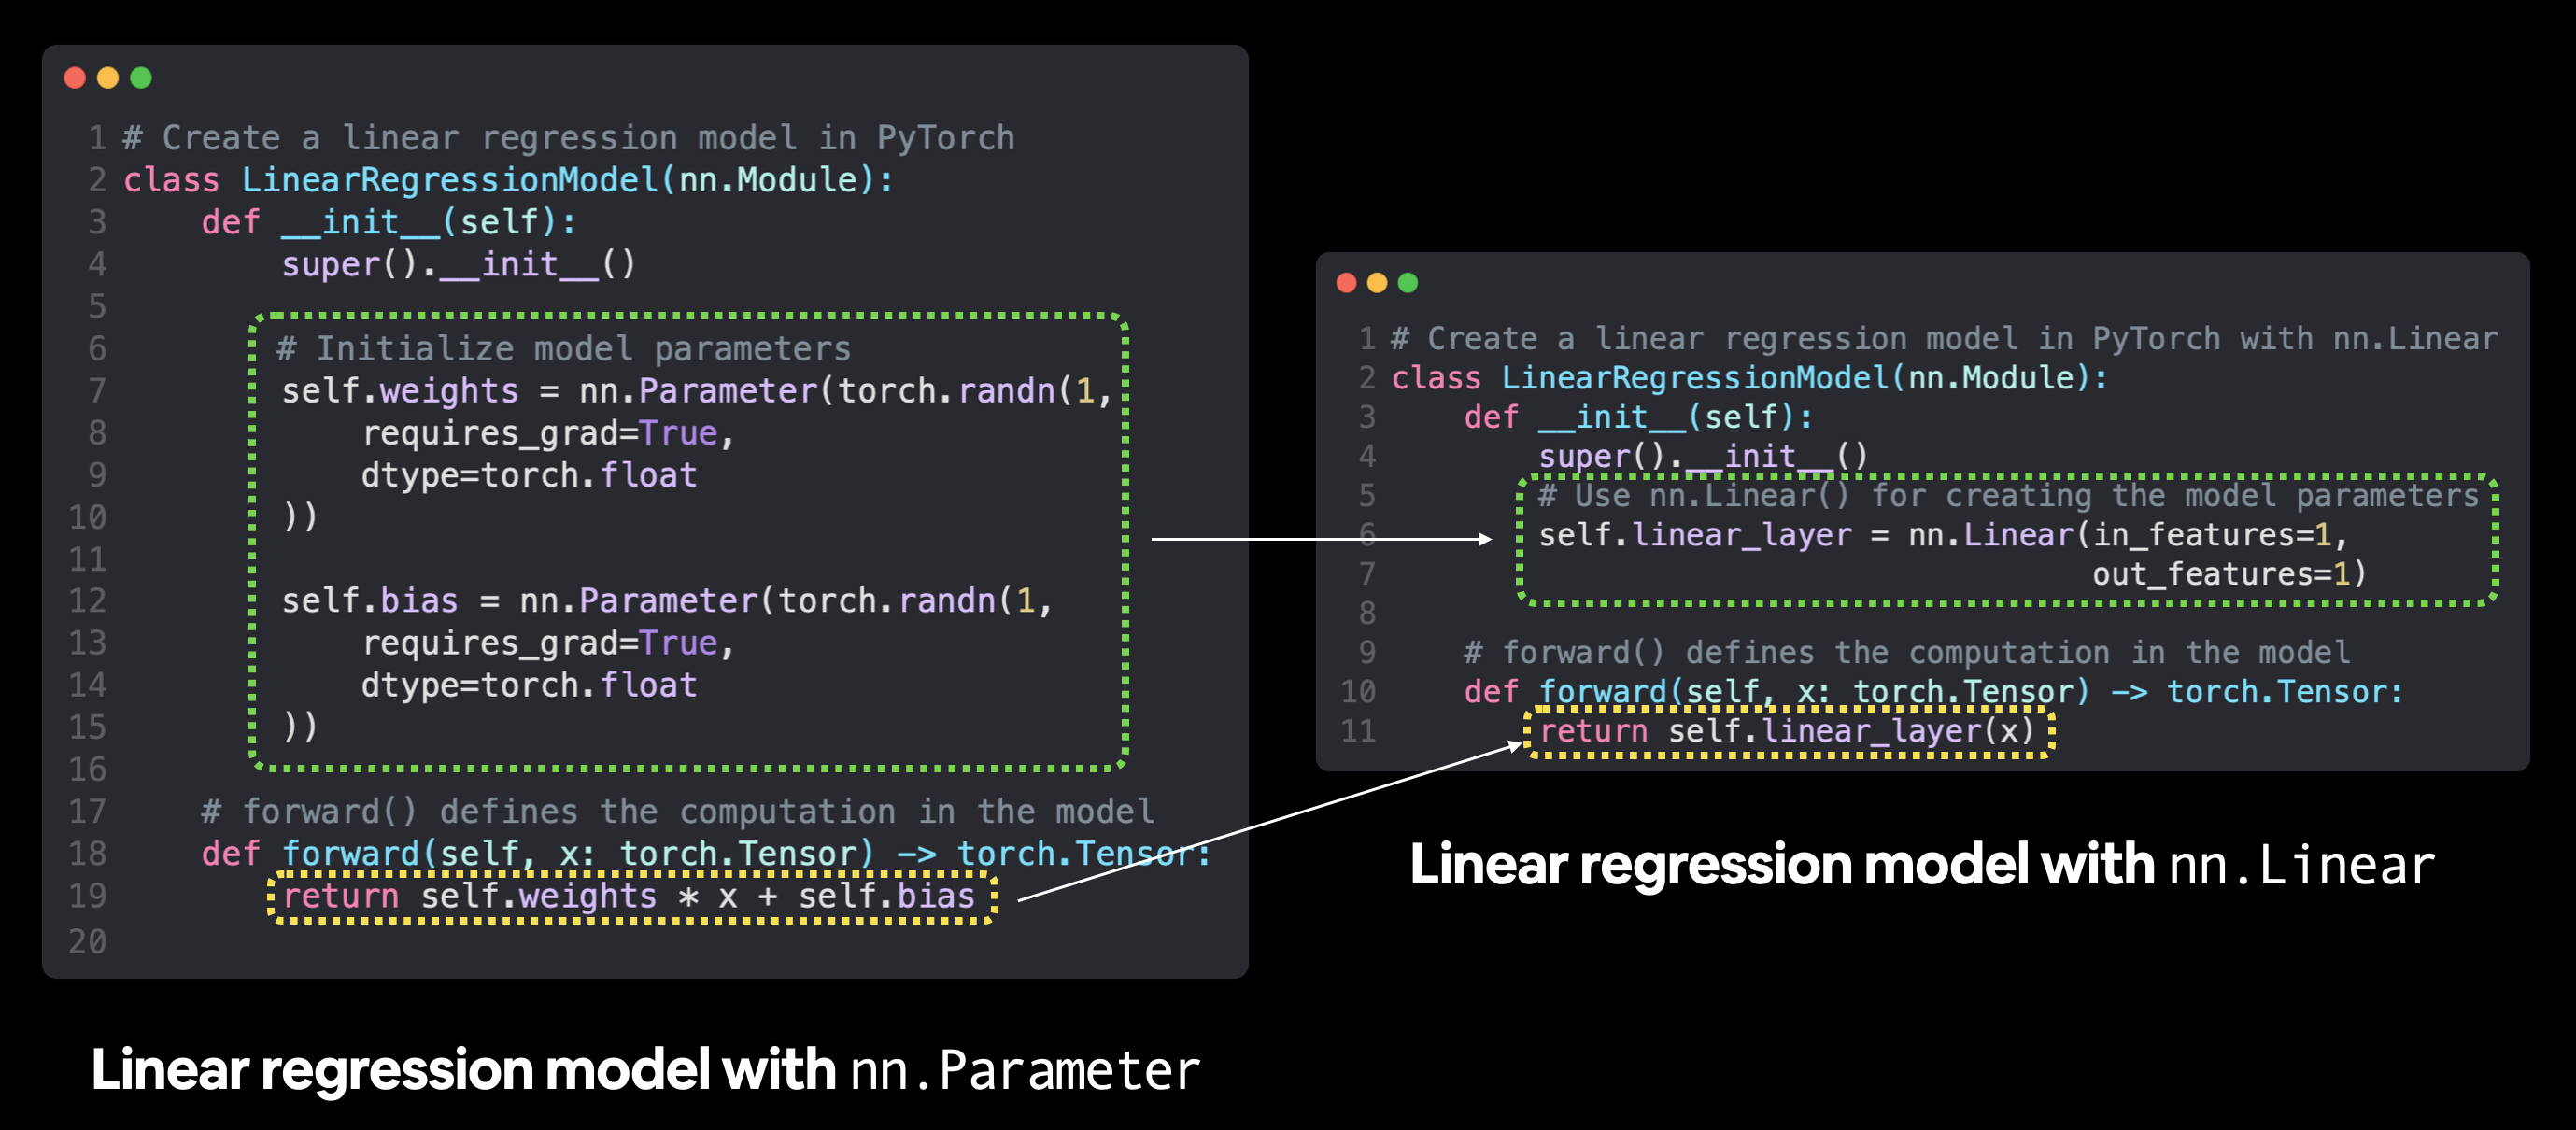

Detail: https://www.learnpytorch.io/01_pytorch_workflow/